# House Price Prediction

In this lab I will predict house prices by square footage using linear regression with one feature (size).

In [100]:
# Load the training data

import csv
import numpy as np

with open("../datasets/housing.csv") as f:
    reader = csv.reader(f)
    header = next(reader)
    data = list(reader)
    
    x_train = ([float(x[1]) * 0.09290304 / 1_000  for x in data])
    y_train = ([float(x[0]) / 10_000_000 for x in data])
    print("x_train:", x_train[:5])
    print("y_train:", y_train[:5])
    
    # For large datasets
    x_train = np.array([float(x[1]) * 0.09290304 / 1_000 for x in data], dtype=np.float64)
    y_train = np.array([float(x[0]) / 10_000_000 for x in data], dtype=np.float64)
    print("x_train:", x_train[:5])
    print("y_train:", y_train[:5])

x_train: [0.6893405568000001, 0.8324112384, 0.9253142784, 0.6967728000000001, 0.6893405568000001]
y_train: [1.33, 1.225, 1.225, 1.2215, 1.141]
x_train: [0.68934056 0.83241124 0.92531428 0.6967728  0.68934056]
y_train: [1.33   1.225  1.225  1.2215 1.141 ]


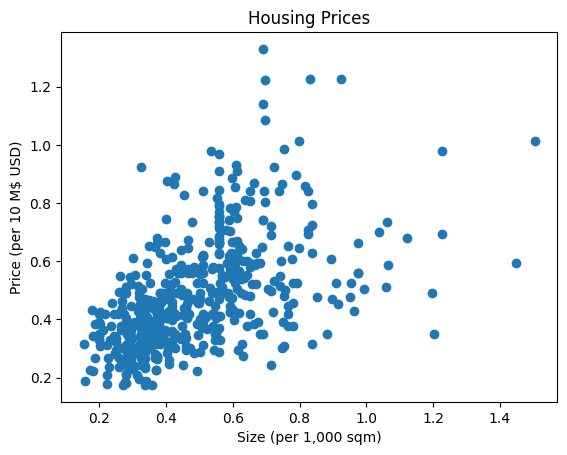

In [101]:
# Plot the training data

import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.title("Housing Prices")
plt.xlabel("Size (per 1,000 sqm)")
plt.ylabel("Price (per 10 M$ USD)")
plt.show()


In [102]:
# Number of training examples

m = len(x_train)
print("m:", m)

# For large datasets

m = x_train.shape[0]
print("m:", m)

del m

m: 545
m: 545


In [103]:
# Define the model (hypothesis) function

def f(x, w, b):
    return w * x + b  # return the predicted value

# Please note: sometimes h(x, w, b) is used
# to represent the hypothesis function

# Example values
x_i = 100.0  # feature
w = 0.5  # weight (slope)
b = 2.0  # bias (y-intercept)

# y-predict = 0.5 * 100.0 + 2.0 = 52.0
print("y-predict:", f(x_i, w, b))

del x_i, w, b

y-predict: 52.0


In [104]:
# Implement cost function J(w, b) with half mean squared error.

import time

# Example values
w = 0.5  # weight (slope)
b = 2.0  # bias (y-intercept)

# Pure Python
def j(x_train: list[float], y_train: list[float], w: float, b: float) -> float:
    m = len(x_train)
    return sum([(f(x, w, b) - y) ** 2 for x, y in zip(x_train, y_train)]) / (2 * m)

start = time.time()
print("Cost:", j(x_train, y_train, w, b))
print("Time:", time.time() - start)

# Numpy version
def j(x_train, y_train, w, b):
    m = x_train.shape[0]
    return np.sum((f(x_train, w, b) - y_train) ** 2) / (2 * m)

start = time.time()
print("Cost:", j(x_train, y_train, w, b))
print("Time:", time.time() - start)

del w, b, start

Cost: 1.56578426275591
Time: 0.0001659393310546875
Cost: 1.5657842627559093
Time: 6.127357482910156e-05


In [105]:
# Compute the gradient for linear regression

# Example values
w = 1  # weight (slope)
b = 0  # bias (y-intercept)

# Pure Python
def compute_gradient(x_train: list[float], y_train, w, b) -> tuple[float, float]:
    dw = 0
    db = 0
    m = len(x_train)
    for x_i, y_i in zip(x_train, y_train):
        dw += (f(x_i, w, b) - y_i) * x_i
        db += f(x_i, w, b) - y_i
    dw /= m
    db /= m
    return dw, db

start = time.time()
dw, db = compute_gradient(x_train, y_train, w, b)
print("Time:", time.time() - start)

print("dw:", dw)
print("db:", db)

# Numpy version
def compute_gradient(x_train, y_train, w, b):
    m = x_train.shape[0]
    dw = np.sum((f(x_train, w, b) - y_train) * x_train) / m
    db = np.sum(f(x_train, w, b) - y_train) / m
    return dw, db

start = time.time()
dw, db = compute_gradient(x_train, y_train, w, b)
print("Time:", time.time() - start)

print("dw:", dw)
print("db:", db)

del w, b, dw, db

Time: 0.0002067089080810547
dw: 0.021272198571105988
db: 0.0018280181959633138
Time: 0.00011205673217773438
dw: 0.02127219857110601
db: 0.0018280181959633407


In [106]:
# Loss function (Mean Squared Error)

# Example values

w = 1  # weight (slope)
b = 0  # bias (y-intercept)

# Pure Python
def compute_loss(x_train, y_train, w, b):
    m = len(x_train)
    total_loss = 0
    for x_i, y_i in zip(x_train, y_train):
        total_loss += (f(x_i, w, b) - y_i) ** 2
    return total_loss / (2 * m)

print("Loss:", compute_loss(x_train, y_train, w, b))

# Numpy version
def compute_loss(x_train, y_train, w, b):
    m = x_train.shape[0]
    return np.sum((f(x_train, w, b) - y_train) ** 2) / (2 * m)

print("Loss:", compute_loss(x_train, y_train, w, b))

del w, b

Loss: 0.017573237415621893
Loss: 0.017573237415621897


## Putting it all together

In [107]:
# Initialize parameters
w = 1  # Initial slope
b = 0  # Initial intercept

# Hyperparameters
learning_rate = 0.1  # Adjusted learning rate for scaled data
max_iterations = 1_000_000
loss_diff_threshold = 1e-12

# Implement the Gradient Descent Loop
# Lists to store the values for plotting
w_history = []
b_history = []
loss_history = []

prev_loss = float('inf')
for i in range(max_iterations):
    # Compute gradients
    dw, db = compute_gradient(x_train, y_train, w, b)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Compute loss
    loss = compute_loss(x_train, y_train, w, b)
    
    # Store values
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss)
        
    # Early stopping
    loss_diff = prev_loss - loss
    if loss_diff < loss_diff_threshold and loss_diff >= 0:
        print(f"Loss difference of {loss_diff} is below the threshold of {loss_diff_threshold}. Break at iteration {iteration}")
        break
    
    # Print progress
    iteration = i + 1
    if iteration % 100 == 0 or iteration == 1:
        print(f"Iteration {iteration}: loss = {loss}, w = {w}, b = {b}, loss_diff = {loss_diff}")
    
    # Update previous loss
    prev_loss = loss


Iteration 1: loss = 0.017528465219764526, w = 0.9978727801428894, b = -0.00018280181959633407, loss_diff = inf
Iteration 100: loss = 0.015076913172037004, w = 0.8563393003617586, b = 0.061085820691069756, loss_diff = 1.7358836358337057e-05
Iteration 200: loss = 0.013808769104619723, w = 0.7557720588139039, b = 0.11083958288854653, loss_diff = 8.996968372565126e-06
Iteration 300: loss = 0.013151498546218212, w = 0.6833711031522649, b = 0.14665861512492834, loss_diff = 4.663068320148386e-06
Iteration 400: loss = 0.012810839627376827, w = 0.6312477806634025, b = 0.17244566381007276, loss_diff = 2.4168370119752314e-06
Iteration 500: loss = 0.012634278396232665, w = 0.5937228512967874, b = 0.19101042780205113, loss_diff = 1.252630401574889e-06
Iteration 600: loss = 0.012542767895203751, w = 0.5667076831008158, b = 0.20437568205374884, loss_diff = 6.492299295234732e-07
Iteration 700: loss = 0.012495338616735904, w = 0.5472587640761764, b = 0.21399767462471314, loss_diff = 3.3649151486188356e

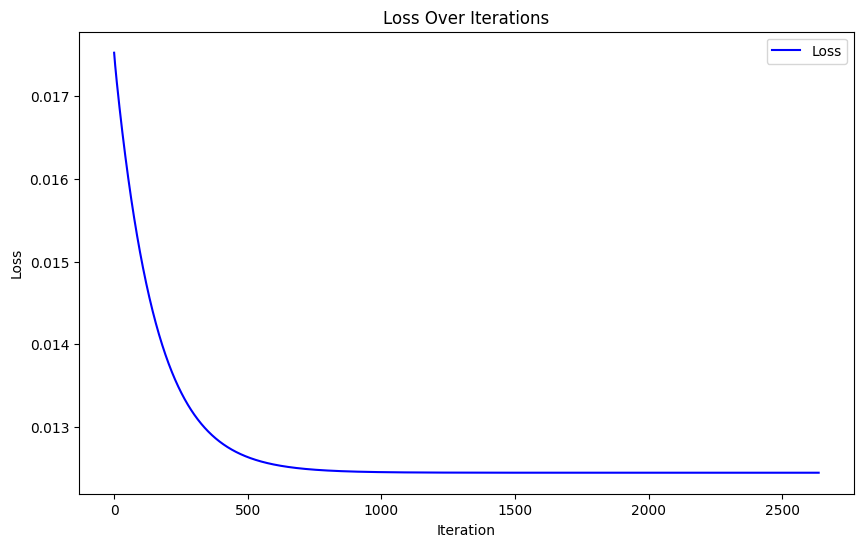

In [108]:
# Plot the Loss Over Iterations

num_iterations = len(w_history)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), loss_history, 'b-', label='Loss')
plt.title('Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

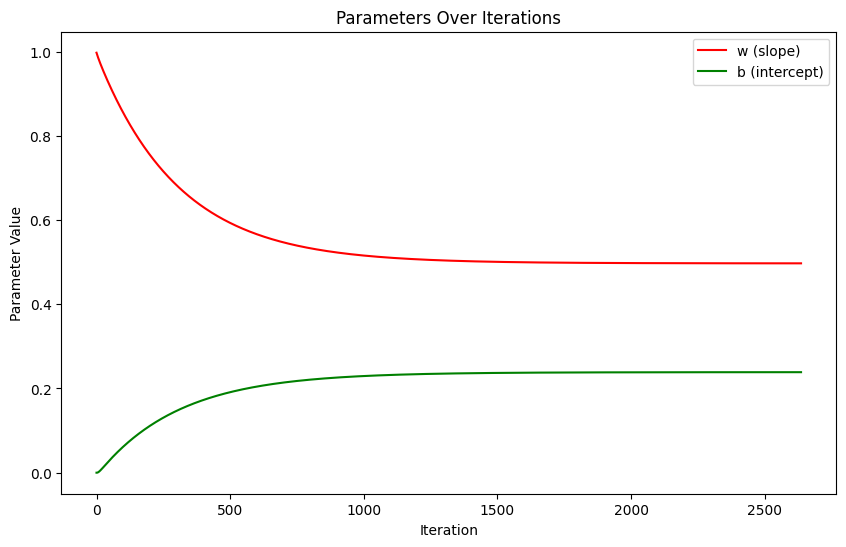

In [109]:
# Plot Parameters Over Iterations

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), w_history, 'r-', label='w (slope)')
plt.plot(range(num_iterations), b_history, 'g-', label='b (intercept)')
plt.title('Parameters Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.legend()
plt.show()

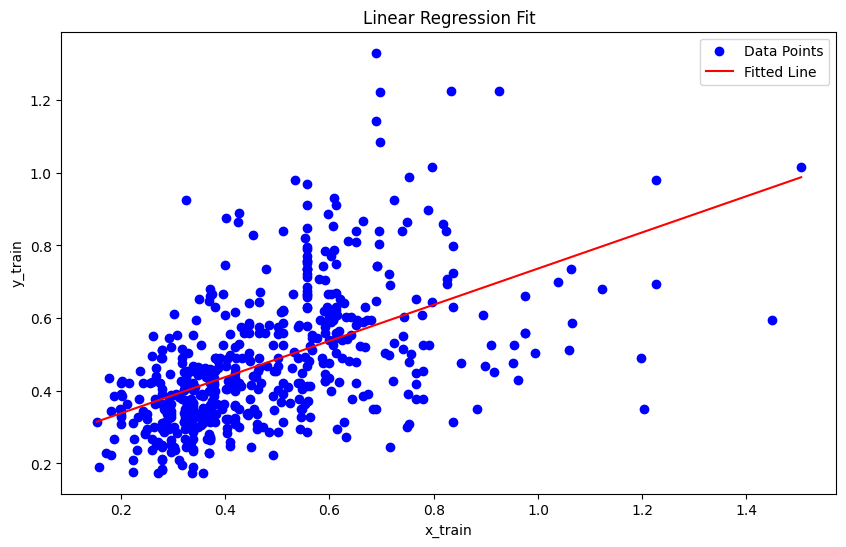

In [110]:
# Visualize the Fitted Line on Data

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Data Points')

# Plot regression line
x_line = np.linspace(min(x_train), max(x_train), 100)
y_line = f(x_line, w, b)
plt.plot(x_line, y_line, color='red', label='Fitted Line')

plt.title('Linear Regression Fit')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()